# Healthcare Diabetes Classifier Project (Logistic_Regression)
## 당뇨병 진단 예측
- 당뇨병이 양성인지 음성인지 예측
- https://www.kaggle.com/datasets/nanditapore/healthcare-diabetes

#### feature (22개)
- Id: 각 데이터 항목의 고유 식별자
- Pregnancies: 임신 횟수
- Glucose: 경구 포도당 내성 테스트에서 2시간 동안의 혈장 포도당 농도
- BloodPressure: 확장기 혈압(mmHg)
- SkinThickness: 삼두근 피부주름 두께(mm)
- Insulin: 2시간 혈청 인슐린(mu U/ml)
- BMI: 체질량 지수(체중(kg) / 키(m^2))
- DiabetesPedigreeFunction: 당뇨병의 유전적 점수인 당뇨병 혈통 기능
- Age: 나이(년)


#### target
- Outcome: 당뇨병의 존재(1) 또는 부재(0)를 나타내는 이진 분류

In [1]:
import pandas as pd

# 데이터 세트 호출
h_df = pd.read_csv('./datasets/Healthcare_Diabetes.csv', low_memory=False)
h_df

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
2763,2764,2,75,64,24,55,29.7,0.370,33,0
2764,2765,8,179,72,42,130,32.7,0.719,36,1
2765,2766,6,85,78,0,0,31.2,0.382,42,0
2766,2767,0,129,110,46,130,67.1,0.319,26,1


#### 📊 데이터 탐색

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# 한글 폰트 경로 설정
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

# 컬러맵 가져오기
cmap = plt.get_cmap('Pastel1')
# 컬러맵의 색상 선택
outer_colors = cmap(np.array([0, 1, 2, 3, 4, 5, 6]))

### 🌟 1Cycle

#### 📊 전처리

In [3]:
# 불필요한 데이터 세트 제거 (id 컬럼)
pre_h_df = h_df.drop(labels='Id', axis=1)

In [4]:
# 언더 샘플링
Outcome0 = pre_h_df[pre_h_df.Outcome == 0].sample(952, random_state=124)
Outcome1 = pre_h_df[pre_h_df.Outcome == 1]
pre_h_df = pd.concat([Outcome0, Outcome1]).reset_index(drop=True)

#### 🚩 1Cycle 결과
- Logistic Regression  
**정확도: 0.7349, 정밀도: 0.7380, 재현율: 0.7263, F1:0.7321, AUC:0.7349**

---

### 🌟 2Cycle

In [5]:
# 수치형 데이터 이상치 제거
from sklearn.preprocessing import StandardScaler

std_pre_h_df = pre_h_df.copy()
columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'DiabetesPedigreeFunction']

for column in columns:
    # 표준화 객체 생성
    std = StandardScaler()
    # 데이터 표준화 변환
    result = std.fit_transform(pre_h_df[[column]])
    # 표준화 데이터 프레임 생성
    std_pre_h_df[column] = result

for column in columns:
    # 타겟 데이터 이상치 제거
    std_pre_h_df = std_pre_h_df[std_pre_h_df[column].between(-1.96, 1.96)]

# 이상치 제거 후 유지되는 인덱스를 대조하여 원본 데이터 이상치 제거
pre_h_df = pre_h_df.iloc[std_pre_h_df.index].reset_index(drop=True)

#### 🚩 1Cycle 결과
- Logistic Regression  
**정확도: 0.7349, 정밀도: 0.7380, 재현율: 0.7263, F1:0.7321, AUC:0.7349**

#### 🚩 2Cycle 결과
- 전처리 후 Logistic Regression  
**정확도: 0.7911, 정밀도: 0.7817, 재현율: 0.7603, F1:0.7708, AUC:0.7890**

#### 💡 분석
- 이상치 제거 후 성능이 향상된 것을 확인함.
- 최소-최대 스케일링(min-max scaling)을 통해 값을 정규화하여 성능 차이를 비교하기로 함.

---

### 🌟 3Cycle

#### 🚩 2Cycle 결과
- Logistic Regression  
**정확도: 0.7911, 정밀도: 0.7817, 재현율: 0.7603, F1:0.7708, AUC:0.7890**

#### 🚩 3Cycle 결과
- Min-Max Scaling  
**정확도: 0.7722, 정밀도: 0.7569, 재현율: 0.7466, F1:0.7517, AUC:0.7703**

#### 💡 분석
- Min-Max Scaling 시 이전 보다 성능이 저하됨에 따라 해당 전처리를 진행하지 않기로 함.
- 피처 이상치 제거 후 성능 평가를 진행하기로 함.

---

### 🌟 4Cycle

#### 🚩 2Cycle 결과
- Logistic Regression  
**정확도: 0.7911, 정밀도: 0.7817, 재현율: 0.7603, F1:0.7708, AUC:0.7890**

#### 🚩 4Cycle 결과
- 특정 피처 이상치 제거  
**정확도: 0.7326, 정밀도: 0.6962, 재현율: 0.7143, F1:0.7051, AUC:0.7308**

#### 💡 분석
- 특정 피처 이상치 제거 시 오히려 성능이 저하되는 것을 확인함.
- 해당 전처리는 진행하지 않는 것으로 하며, 분포 변환을 별도로 진행하기로 함.

---

### 🌟 5Cycle

#### 🚩 2Cycle 결과
- Logistic Regression  
**정확도: 0.7911, 정밀도: 0.7817, 재현율: 0.7603, F1:0.7708, AUC:0.7890**

#### 🚩 5Cycle 결과
- 분포 변환  
**정확도: 0.7880, 정밀도: 0.7801, 재현율: 0.7534, F1:0.7666, AUC:0.7855**

#### 💡 분석
- 분포 변환 후 성능이 근소하게 하락함에 따라 해당 전처리를 진행하지 않는 것으로 함.
- 차원축소 후 성능 평가를 진행하려 함.

---

### 🌟 6~7Cycle

#### 🚩 2Cycle 결과
- Logistic Regression  
**정확도: 0.7911, 정밀도: 0.7817, 재현율: 0.7603, F1:0.7708, AUC:0.7890**

#### 🚩 6Cycle 결과
- PCA
**정확도: 0.7405, 정밀도: 0.7462, 재현율: 0.6644, F1:0.7029, AUC:0.7351**

#### 🚩 7Cycle 결과
- LDA
**정확도: 0.2184, 정밀도: 0.1656, 재현율: 0.1712, F1:0.1684, AUC:0.2150**

#### 💡 분석
- 차원축소 진행 후 성능이 많이 하락한 것을 확인할 수 있음.
- 상관관계, 다중 공산성 등을 확인하여 전처리 진행 후 성능 평가를 진행하고자 함.

---

### 🌟 8Cycle

In [6]:
# 상관 관계가 낮은 피처 제거
pre_h_df = pre_h_df.drop(labels=['SkinThickness'], axis=1)

#### 🚩 2Cycle 결과
- Logistic Regression  
**정확도: 0.7911, 정밀도: 0.7817, 재현율: 0.7603, F1:0.7708, AUC:0.7890**

#### 🚩 8Cycle 결과
- 상관관계
**정확도: 0.7943, 정밀도: 0.7872, 재현율: 0.7603, F1:0.7735, AUC:0.7919**

#### 💡 분석
- 상관관계 등 다양한 지표 확인 후 관계가 낮은 피처를 제거한 결과 성능이 향상된 것을 확인함.
- 전처리된 데이터를 토대로 임계값을 조정하려 함.

---

### 🌟 9Cycle

In [7]:
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix, ConfusionMatrixDisplay, f1_score, roc_auc_score
import matplotlib.pyplot as plt

def get_evaluation(y_test, prediction, classifier=None, X_test=None):
    confusion = confusion_matrix(y_test, prediction)
    accuracy = accuracy_score(y_test , prediction)
    precision = precision_score(y_test , prediction)
    recall = recall_score(y_test , prediction)
    f1 = f1_score(y_test, prediction)
    roc_auc = roc_auc_score(y_test, prediction)

    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}, AUC:{4:.4f}'.format(accuracy , precision ,recall, f1, roc_auc))
    print("#" * 75)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE

# 데이터 세트 분리
# 피처, 타겟 데이터 분리
features, targets = pre_h_df.iloc[:, :-1], pre_h_df.iloc[:, -1]

# 문제/정답 및 훈련/테스트 데이터 분리 
X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, stratify=targets, random_state=124)

# 객체 생성
# solver: 최적화에 사용되는 알고리즘 (liblinear: 작은 데이터 세트 사용)
# penalty: 규제 유형 (l2 = L2 규제)
lg = LogisticRegression(solver='liblinear', penalty='l2', random_state=124)

# 훈련
lg.fit(X_train, y_train)

# 예측
prediction = lg.predict(X_test)

오차 행렬
[[140  30]
 [ 35 111]]
정확도: 0.7943, 정밀도: 0.7872, 재현율: 0.7603, F1:0.7735, AUC:0.7919
###########################################################################


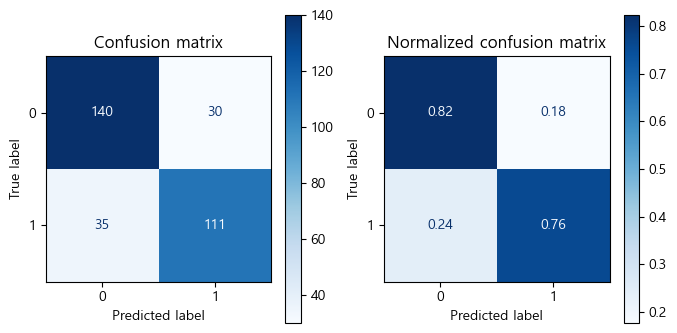

In [9]:
get_evaluation(y_test, prediction, lg, X_test)

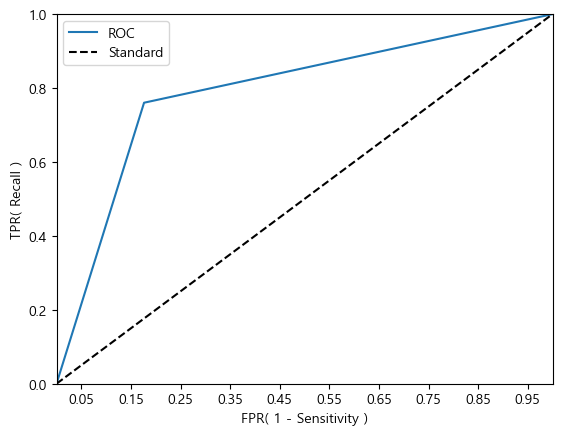

In [26]:
from sklearn.metrics import roc_curve

def roc_curve_plot(y_test , proba_class1):
#     임계값에 따른 FPR, TPR 값
    fprs, tprs, thresholds = roc_curve(y_test, proba_class1)

#     ROC Curve를 plot 곡선으로 그림. 
    plt.plot(fprs , tprs, label='ROC')
#     가운데 대각선 직선을 그림. 
#     TPR과 FPR이 동일한 비율로 떨어진다는 것은 모델이 양성과 음성을 구별하지 못한다는 것을 의미한다.
#     다른 분류기를 판단하기 위한 기준선으로 사용되며, 
#     대각선에 가까울 수록 예측에 사용하기 힘든 모델이라는 뜻이다.
    plt.plot([0, 1], [0, 1], 'k--', label='Standard')
    
    # X축(FPR)의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test, prediction)

##### 시나리오: 당뇨병이 음성 환자인지 양성 환자인지 분류하는 의료 진단

- 음성(Negative): 당뇨병 음성 환자를 의미.
- 양성(Positive): 당뇨병 양성 환자를 의미.

<br>

#### 문제: 당뇨병 진단

>True Positive (TP): 모델이 양성 환자를 양성으로 올바르게 분류한 경우.  
False Positive (FP): 모델이 음성 환자를 양성으로 잘못 분류한 경우(오진, error I).  
True Negative (TN): 모델이 음성 환자를 음성으로 올바르게 분류한 경우.  
False Negative (FN): 모델이 양성 환자를 음성으로 잘못 분류한 경우(놓침, error II).  

<br>

>정밀도 (Precision): 모델이 양성으로 예측한 환자 중에서 실제로 양성인 환자의 비율을 나타낸다.  
>즉, 음성 클래스로 예측한 결과 중 얼마나 많은 것이 진짜 음성인지 측정한다.

>재현율 (Recall): 실제 양성 환자 중에서 모델이 양성으로 정확하게 예측한 환자의 비율을 나타낸다.  
>즉, 모델이 얼마나 많은 양성 환자를 "놓치지 않고" 감지했는지 측정한다.  

<br>

> 🏆 양성인 환자를 놓치지 않는 것이 중요하다고 판단되므로, 임계치를 낮춰서 재현율을 높여주는 것이 적합하다.

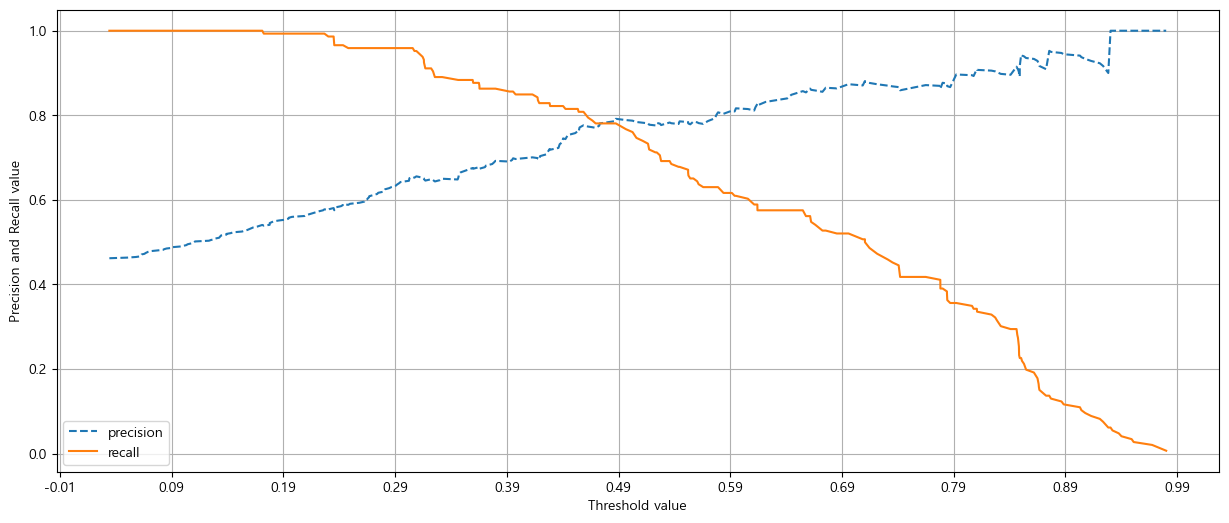

In [25]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.metrics import precision_recall_curve

def precision_recall_curve_plot(y_test , prediction_proba_class1):

    precisions, recalls, thresholds = precision_recall_curve(y_test, prediction_proba_class1)
    
    # X축: threshold
    # Y축: 정밀도, 재현율 
    # 정밀도는 점선으로 표시
    plt.figure(figsize=(15,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # X축(threshold)의 Scale을 0 ~ 1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, lg.predict_proba(X_test)[:, 1] )

In [11]:
# 임계값 확인
_, _, thresholds = precision_recall_curve(y_test, lg.predict_proba(X_test)[:, 1])
thresholds

array([0.03415639, 0.0501935 , 0.05790515, 0.06186694, 0.06298029,
       0.06564293, 0.06637457, 0.06877584, 0.07077649, 0.0821883 ,
       0.08326323, 0.08538339, 0.09076091, 0.09107849, 0.09837705,
       0.10327689, 0.10400719, 0.1093898 , 0.11010349, 0.11087008,
       0.12330801, 0.12512667, 0.12827915, 0.12919752, 0.1324206 ,
       0.13303999, 0.13416364, 0.13886896, 0.13906991, 0.14294044,
       0.14496685, 0.15297094, 0.15526052, 0.15778306, 0.15944882,
       0.16291662, 0.16643235, 0.1710495 , 0.17241754, 0.17770129,
       0.17771388, 0.18114866, 0.1860587 , 0.19237065, 0.19450109,
       0.19479081, 0.19764849, 0.20933845, 0.21083943, 0.21357389,
       0.21881785, 0.22196325, 0.22550188, 0.2266871 , 0.23017942,
       0.23129816, 0.23493041, 0.23551467, 0.23619021, 0.23706407,
       0.23725529, 0.24149256, 0.24313124, 0.24337078, 0.24802469,
       0.24952521, 0.2580554 , 0.2622927 , 0.26233302, 0.26476968,
       0.26554105, 0.26656338, 0.26687358, 0.27395161, 0.27481

In [12]:
from sklearn.preprocessing import Binarizer
def get_evaluation_by_thresholds(y_test, prediction_proba_class1, thresholds):
    
    for threshold in thresholds:
        binarizer = Binarizer(threshold=threshold).fit(prediction_proba_class1) 
        custom_prediction = binarizer.transform(prediction_proba_class1)
        print('임곗값:', threshold)
        get_evaluation(y_test, custom_prediction)

In [13]:
# 임계값 조정
get_evaluation_by_thresholds(y_test, lg.predict_proba(X_test)[:, 1].reshape(-1, 1), thresholds)

임곗값: 0.034156386461235325
오차 행렬
[[  1 169]
 [  0 146]]
정확도: 0.4652, 정밀도: 0.4635, 재현율: 1.0000, F1:0.6334, AUC:0.5029
###########################################################################
임곗값: 0.05019350409828044
오차 행렬
[[  2 168]
 [  0 146]]
정확도: 0.4684, 정밀도: 0.4650, 재현율: 1.0000, F1:0.6348, AUC:0.5059
###########################################################################
임곗값: 0.05790514580939996
오차 행렬
[[  3 167]
 [  0 146]]
정확도: 0.4715, 정밀도: 0.4665, 재현율: 1.0000, F1:0.6362, AUC:0.5088
###########################################################################
임곗값: 0.06186694202389823
오차 행렬
[[  6 164]
 [  0 146]]
정확도: 0.4810, 정밀도: 0.4710, 재현율: 1.0000, F1:0.6404, AUC:0.5176
###########################################################################
임곗값: 0.0629802862668754
오차 행렬
[[  7 163]
 [  0 146]]
정확도: 0.4842, 정밀도: 0.4725, 재현율: 1.0000, F1:0.6418, AUC:0.5206
###########################################################################
임곗값: 0.06564292763679222
오차 행렬
[[  8 162]
 [ 

C:\Users\LEGION\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


- **임계값 조정**  
임곗값: 0.45512107042853733  
오차 행렬  
[[136  34]  
 [ 28 118]]  
**정확도: 0.8038, 정밀도: 0.7763, 재현율: 0.8082, F1:0.7919, AUC:0.8041**

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# 타겟 데이터와 예측 객체를 전달받는다.
def get_evaluation_by_custom_proba(y_test, prediction, visualize=False):
#     오차 행렬
    confusion = confusion_matrix(y_test, prediction)
#     정확도
    accuracy = accuracy_score(y_test , prediction)
#     정밀도
    precision = precision_score(y_test , prediction)
#     재현율
    recall = recall_score(y_test , prediction)
#     F1 score
    f1 = f1_score(y_test, prediction)
#     ROC-AUC
    roc_auc = roc_auc_score(y_test, prediction)
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, ROC-AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
    print("#" * 80)
    
    if visualize:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_predictions(y_test, prediction, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

오차 행렬
[[135  35]
 [ 28 118]]
정확도: 0.8006, 정밀도: 0.7712, 재현율: 0.8082, F1: 0.7893, ROC-AUC: 0.8012
################################################################################


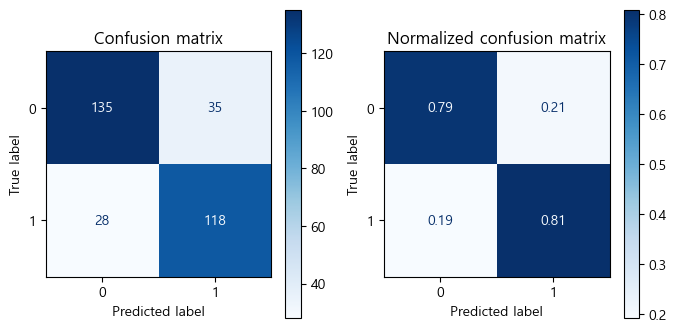

In [15]:
binarizer = Binarizer(threshold=0.455)
custom_prediction = binarizer.fit_transform(lg.predict_proba(X_test)[:, 1].reshape(-1, 1))
get_evaluation_by_custom_proba(y_test, custom_prediction, True)

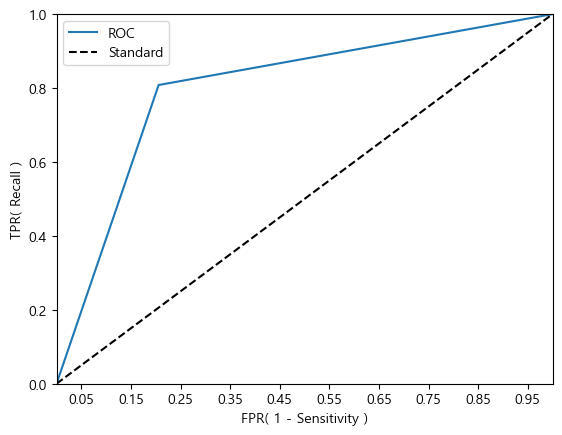

In [23]:
from sklearn.metrics import roc_curve

def roc_curve_plot(y_test , proba_class1):
#     임계값에 따른 FPR, TPR 값
    fprs, tprs, thresholds = roc_curve(y_test, proba_class1)

#     ROC Curve를 plot 곡선으로 그림. 
    plt.plot(fprs , tprs, label='ROC')
#     가운데 대각선 직선을 그림. 
#     TPR과 FPR이 동일한 비율로 떨어진다는 것은 모델이 양성과 음성을 구별하지 못한다는 것을 의미한다.
#     다른 분류기를 판단하기 위한 기준선으로 사용되며, 
#     대각선에 가까울 수록 예측에 사용하기 힘든 모델이라는 뜻이다.
    plt.plot([0, 1], [0, 1], 'k--', label='Standard')
    
    # X축(FPR)의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test, custom_prediction)

In [40]:
result_df = pd.DataFrame({
    '예측': custom_prediction.flatten(),
    '정답': y_test
})

display(result_df.head()) 

,예측,정답
100,0.0,0
1362,1.0,1
1216,1.0,1
1019,1.0,1
32,0.0,0


In [17]:
data = {
    'model': ['9Cycle', '10Cycle'],
    '정확도': [0.7943, 0.8006],
    '정밀도': [0.7872, 0.7712],
    '재현율': [0.7603, 0.8082],
    'F1': [0.7735, 0.7893],
    'AUC': [0.7919, 0.8012]
}

Cycle9 = pd.DataFrame(data)

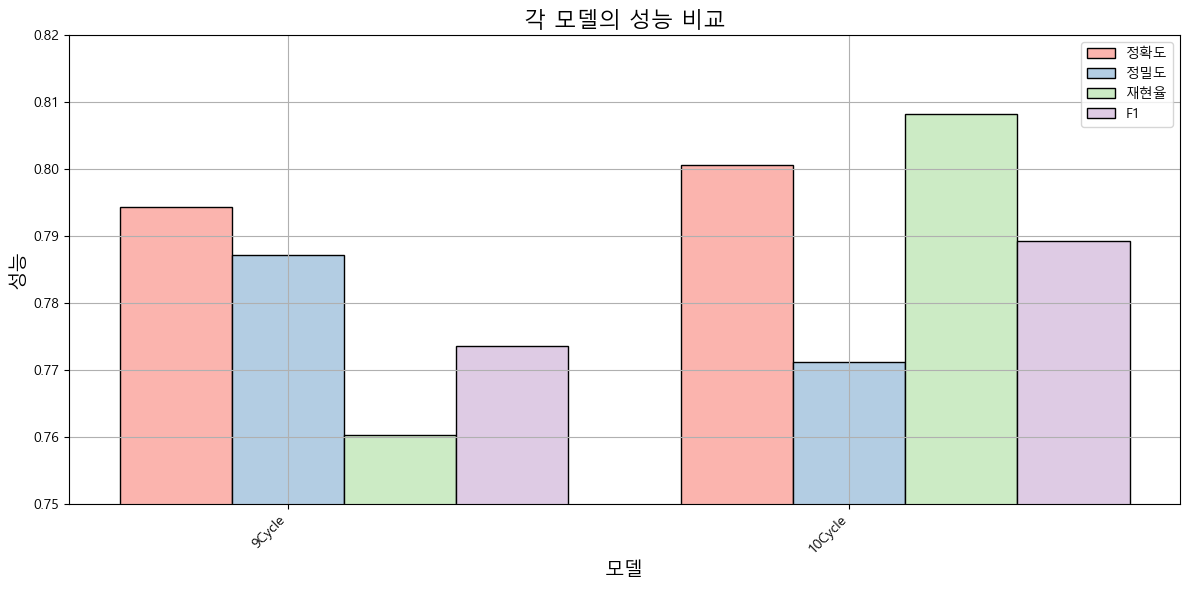

,model,정확도,정밀도,재현율,F1,AUC
0,9Cycle,0.7943,0.7872,0.7603,0.7735,0.7919
1,10Cycle,0.8006,0.7712,0.8082,0.7893,0.8012


In [18]:
import matplotlib.pyplot as plt
import numpy as np

# 데이터 프레임에서 각 모델명과 해당 지표들을 추출합니다.
models = Cycle9['model']
accuracy = Cycle9['정확도']
precision = Cycle9['정밀도']
recall = Cycle9['재현율']
f1 = Cycle9['F1']
AUC = Cycle9['AUC']

# 그래프를 그립니다.
bar_width = 0.2
index = np.arange(len(models))

# 컬러맵 가져오기
cmap = plt.get_cmap('Pastel1')

plt.figure(figsize=(12, 6))

plt.bar(index, accuracy, color=cmap(np.array([0])), width=bar_width, label='정확도', edgecolor='black')
plt.bar(index + bar_width, precision, color=cmap(np.array([1])), width=bar_width, label='정밀도', edgecolor='black')
plt.bar(index + 2*bar_width, recall, color=cmap(np.array([2])), width=bar_width, label='재현율', edgecolor='black')
plt.bar(index + 3*bar_width, f1, color=cmap(np.array([3])), width=bar_width, label='F1', edgecolor='black')
# plt.bar(index + 4*bar_width, AUC, color=cmap(np.array([4])), width=bar_width, label='AUC', edgecolor='black')

plt.title('각 모델의 성능 비교', fontsize=16)
plt.xlabel('모델', fontsize=14)
plt.ylabel('성능', fontsize=14)
plt.xticks(index + bar_width, models, rotation=45, ha='right')
plt.legend()
plt.grid(True)

# y축의 범위 지정
plt.ylim(0.75, 0.82)

plt.tight_layout()
plt.show()

display(Cycle9)

#### 🚩 8Cycle 결과
- 상관관계 전처리
**정확도: 0.7943, 정밀도: 0.7872, 재현율: 0.7603, F1:0.7735, AUC:0.7919**

#### 🚩 9Cycle 결과
- 임계값 조정  
**정확도: 0.8006, 정밀도: 0.7712, 재현율: 0.8082, F1: 0.7893, AUC: 0.8012**

#### 💡 분석
- 재현율을 높이기 위해 임계값을 조정한 결과 정밀도는 약간 하락하였지만, 전체적인 수치는 향상된 것을 확인함.
- 정확도가 0.8정도가 나오는 것으로 보아 신뢰성이 있는 모델이라고 판단됨.

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# 컬러맵 가져오기
cmap = plt.get_cmap('Pastel1')
# 컬러맵의 색상 선택
colors = cmap(np.array([0, 1, 2, 3, 4, 5, 6]))

# 한글 폰트 경로 설정
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

In [27]:
import pandas as pd

cycle_data = {
    'model': ['1Cycle', '2Cycle', '3Cycle'],
    '정확도': [0.7349, 0.7943, 0.8038],
}

cycle = pd.DataFrame(cycle_data)

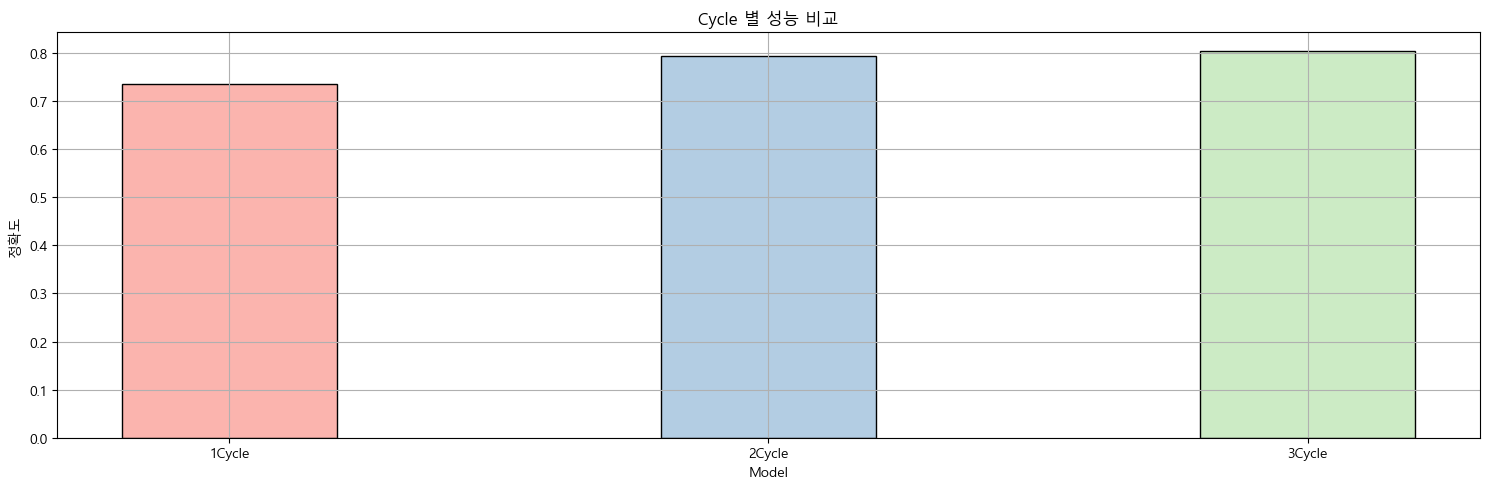

,model,정확도
0,1Cycle,0.7349
1,2Cycle,0.7943
2,3Cycle,0.8038


In [31]:
import matplotlib.pyplot as plt
import numpy as np

# 그래프 그리기
plt.figure(figsize=(15, 5))

plt.bar(cycle['model'], cycle['정확도'], color=colors, edgecolor='black', width=0.4)
plt.title('Cycle 별 성능 비교')
plt.xlabel('Model')
plt.ylabel('정확도')
plt.grid(True)

# # y축의 범위 지정
# plt.ylim(0.5, 1.0)

plt.tight_layout()
plt.show()

display(cycle)